<a href="https://colab.research.google.com/github/marceloamancio/models/blob/master/Binary_Classification_using_Logistic_Regression_in_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification using Logistic Regression

* Input: $x \in \mathbb{R}^{N_x}$ 
* Outpyt: $y \in \{0,1\}$ 
* $X \rightarrow y$
* m training examples $\{(x^{(1)},y^{(1)}),..,(x^{(m)},y^{(m)})\}$
* $y = \{(y^{(1)},..,y^{(m)}\}$



In [1]:
from sklearn.datasets import make_blobs
import numpy as np

# Generate a simple dataset
centers = [[1, 1], [3, 3]]
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2)
X, y = np.array(X), np.array(y)
print('X.shape={}, Y.shape={}'.format(X.shape, y.shape))

X.shape=(1000, 2), Y.shape=(1000,)


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

# Split between train and test 50/50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


## Plot dataset

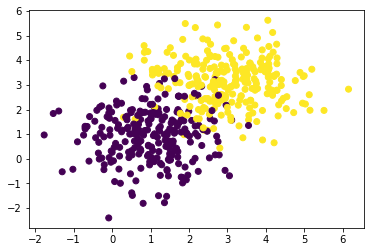

In [3]:
import matplotlib.pyplot as plt

# Artificially generated dataset
x_index, y_index = 0, 1
plt.scatter(X_train[:,x_index], X_train[:,y_index], c = y_train)
plt.show()

# Creating a model in Pytorch

* Given x, want $Pr(y=1|x)$
* output $\hat{y} = \sigma{(W^tx+b)}$


In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    # self.linear = nn.Linear(2,D_in) That's a better way to do it

    self.w1 = nn.Parameter(torch.tensor(0.0), requires_grad = True)
    self.w2 = nn.Parameter(torch.tensor(0.0), requires_grad = True)
    self.b = nn.Parameter(torch.tensor(0.0), requires_grad = True)

  def forward(self,x):
    return torch.sigmoid(self.w1 * x[:,0] + self.w2 * x[:,1] + self.b)

model_lr
model_lr = LogisticRegression()

# Pytorch steps


```
out = model(input)
loss = loss_fn(out, y)
optimizer.zero_grad()
loss.backward()
optimizer.step()
```





## Loss

* $L(\hat{y}, y) = -1 * (y*log\hat{y} + (1-y) * log(1-\hat{y}  ))$

In [5]:
def my_loss(output, target):
  return (-1 * (target * torch.log(output) + (1-target) * torch.log(1-output))).mean()


In [6]:
from torch import optim
n_epochs = 10000

X_tensor = torch.Tensor(X_train)
y_tensor = torch.Tensor(y_train)

optimizer = optim.SGD(model_lr.parameters(), lr=0.01)

for epoch in range(n_epochs):
  out = model_lr(X_tensor)
  loss = my_loss(out, y_tensor)
  if epoch % 1000 == 0:
    print(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(0.6931, grad_fn=<MeanBackward0>)
tensor(0.3955, grad_fn=<MeanBackward0>)
tensor(0.3166, grad_fn=<MeanBackward0>)
tensor(0.2765, grad_fn=<MeanBackward0>)
tensor(0.2526, grad_fn=<MeanBackward0>)
tensor(0.2367, grad_fn=<MeanBackward0>)
tensor(0.2255, grad_fn=<MeanBackward0>)
tensor(0.2171, grad_fn=<MeanBackward0>)
tensor(0.2106, grad_fn=<MeanBackward0>)
tensor(0.2055, grad_fn=<MeanBackward0>)


---

# Get prediction
* and apply it to test data

In [7]:
with torch.no_grad():
  out = model_lr(X_test)
  out = (out > 0.5).int()  
  y_pred = out
  print(y_pred.shape)

torch.Size([500])


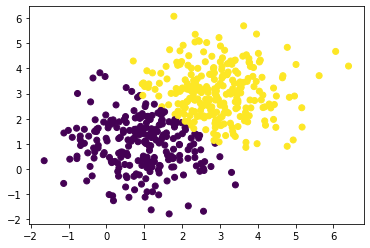

In [8]:
import matplotlib.pyplot as plt

x_index, y_index = 0, 1
plt.scatter(X_test[:,x_index], X_test[:,y_index], c = y_pred)
plt.show()

### Misclassification in red

accuracy:  0.916


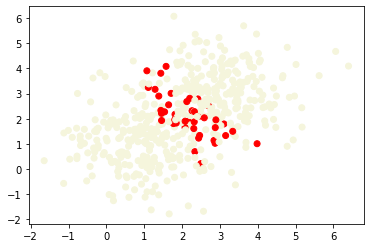

In [9]:
import matplotlib.pyplot as plt

y_diff = (y_pred != torch.tensor(y_test))
acc = 1 - y_diff.float().mean()
print('accuracy: ', acc.detach().numpy())
x_index, y_index = 0, 1
plt.scatter(X_test[:,x_index], X_test[:,y_index], c = ['red' if y else  'beige' for y in y_diff.int()])
plt.show()

---